In [65]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [75]:
TrainDataDir = "./plant/train"
DataFrameDir = pd.read_csv("./plant/train.csv")

In [76]:
def append_ext(fn):
    return fn+".jpg"

DataFrameDir["image_id"]=DataFrameDir["image_id"].apply(append_ext)

datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2)

train_generator=datagen.flow_from_dataframe(
    dataframe=DataFrameDir,
    directory=TrainDataDir,
    x_col="image_id",
    y_col=["healthy", "multiple_diseases", "rust", "scab"],
    subset="training",
    batch_size=30,
    shuffle=True,
    class_mode="raw",
    target_size=(300, 300))

valid_generator=datagen.flow_from_dataframe(
    dataframe=DataFrameDir,
    directory=TrainDataDir,
    x_col="image_id",
    y_col=["healthy", "multiple_diseases", "rust", "scab"],
    subset="validation",
    batch_size=30,
    shuffle=True,
    class_mode="raw",
    target_size=(300, 300))

Found 1457 validated image filenames.
Found 364 validated image filenames.


In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
optim = tf.keras.optimizers.RMSprop(learning_rate=1e-7, momentum=0.9)
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

history = model.fit(
      train_generator,
      epochs=10,
      validation_data=valid_generator,
      verbose=1)

Epoch 1/10
49/49 [==============================] - 51s 1s/step - loss: 1.3863 - acc: 0.2512 - val_loss: 1.3553 - val_acc: 0.2747
Epoch 2/10
49/49 [==============================] - 50s 1s/step - loss: 1.3288 - acc: 0.3322 - val_loss: 1.3103 - val_acc: 0.3214
Epoch 3/10
21/49 [===========>..................] - ETA: 22s - loss: 1.3074 - acc: 0.3258

KeyboardInterrupt: 

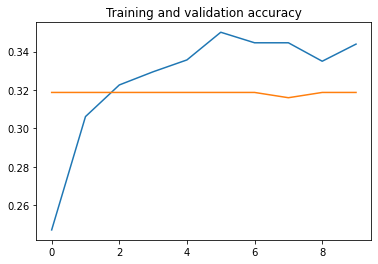

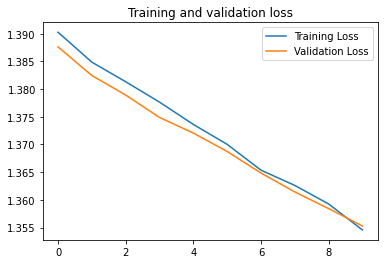

In [84]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()